In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [7]:
X,y= make_moons(100,noise=.25,random_state=2)

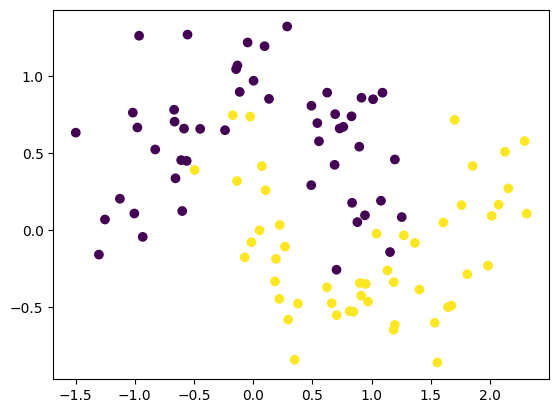

In [8]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [9]:
model1= Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
adam= Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [14]:
history1=model1.fit(X,y, epochs=2000, validation_split=0.2, verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5898 - loss: 0.6372 - val_accuracy: 0.9000 - val_loss: 0.3568
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8328 - loss: 0.4283 - val_accuracy: 0.9000 - val_loss: 0.2347
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8172 - loss: 0.4229 - val_accuracy: 0.9000 - val_loss: 0.2973
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8391 - loss: 0.4243 - val_accuracy: 0.9000 - val_loss: 0.2286
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8430 - loss: 0.3491 - val_accuracy: 0.9000 - val_loss: 0.2036
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8250 - loss: 0.4037 - val_accuracy: 0.9000 - val_loss: 0.2089
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8523 - loss: 0.3151 - val_accuracy: 0.9000 - val_loss: 0.2669
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8523 - loss: 0.3250 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


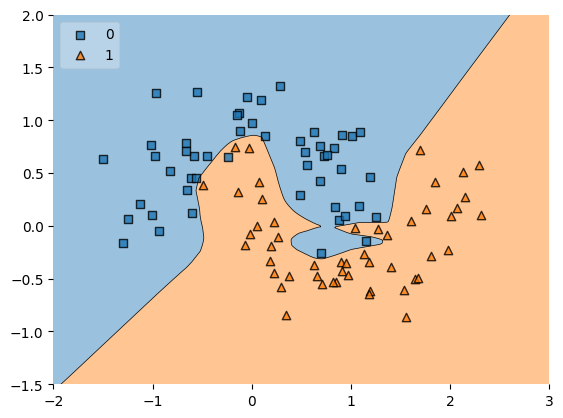

In [15]:
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

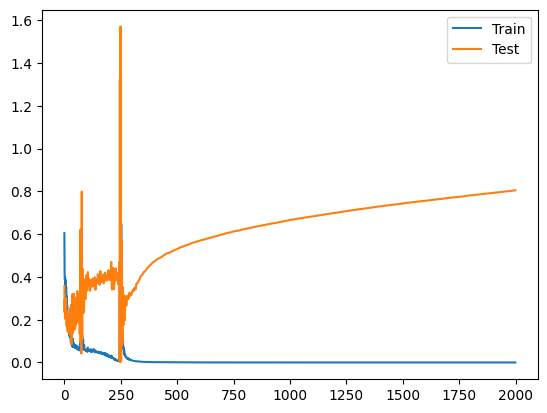

In [19]:
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Test')
plt.legend()

In [23]:
model= Sequential()

model.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model.add(Dense(1, activation='sigmoid'))

In [26]:
adam= Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])



In [27]:
history=model.fit(X,y, epochs=2000, validation_split=0.2, verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.4742 - loss: 4.2641 - val_accuracy: 0.8500 - val_loss: 2.6970
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7422 - loss: 2.4798 - val_accuracy: 0.9000 - val_loss: 1.4961
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8062 - loss: 1.4117 - val_accuracy: 0.9000 - val_loss: 0.8550
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7969 - loss: 0.9056 - val_accuracy: 0.9000 - val_loss: 0.5906
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8406 - loss: 0.6670 - val_accuracy: 0.9000 - val_loss: 0.5206
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8227 - loss: 0.6400 - val_accuracy: 0.9000 - val_loss: 0.4874
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8523 - loss: 0.6351 - val_accuracy: 0.9000 - val_loss: 0.5773
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8461 - loss: 0.6226 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


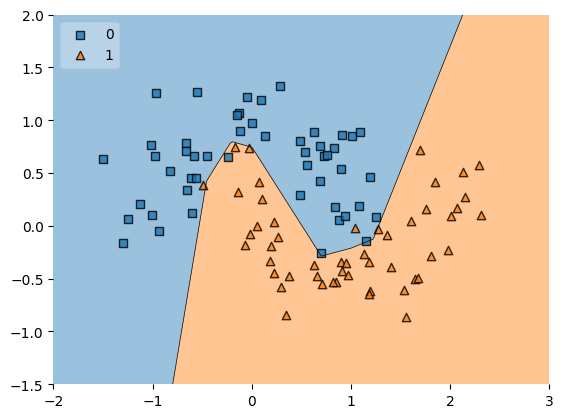

In [28]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

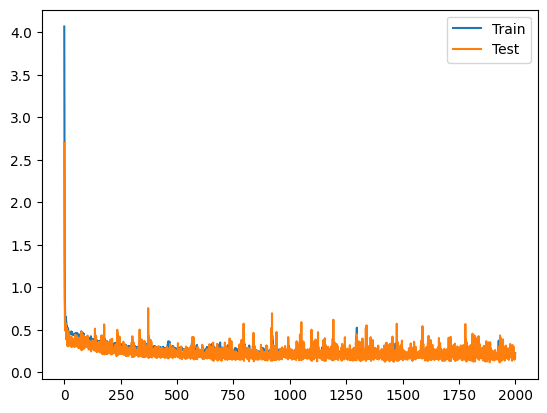

In [29]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()

In [30]:
model1_weight_layer1= model1.get_weights()[0].reshape(256)
model_weight_layer1= model.get_weights()[0].reshape(256)

<Axes: >

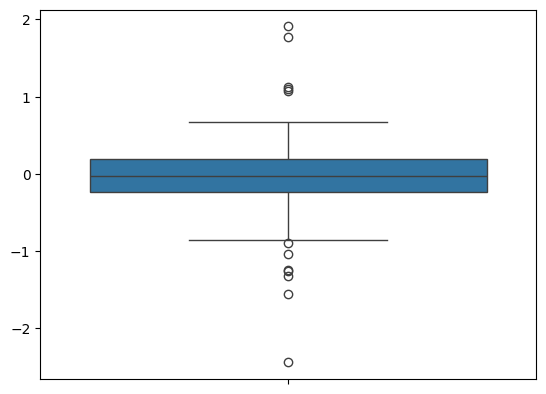

In [31]:
sns.boxplot(model1_weight_layer1)

<Axes: >

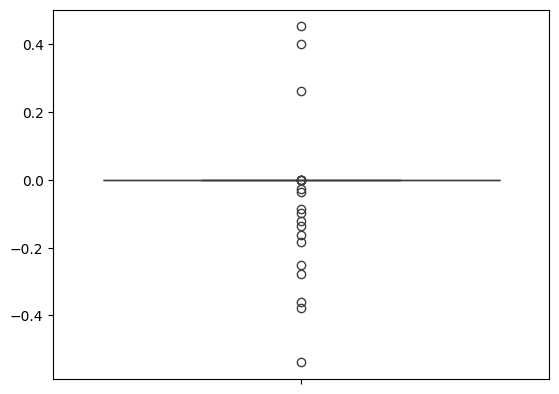

In [32]:
sns.boxplot(model_weight_layer1)

In [33]:
model1_weight_layer1.max()

np.float32(1.9093387)

In [35]:
model1_weight_layer1.min()

np.float32(-2.4406047)

In [36]:
model_weight_layer1.max()

np.float32(0.45143875)

In [37]:
model_weight_layer1.min()


np.float32(-0.5380873)

/tmp/ipython-input-40-2610749969.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1, hist=False)
/tmp/ipython-input-40-2610749969.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer1, hist=False)


<Axes: ylabel='Density'>

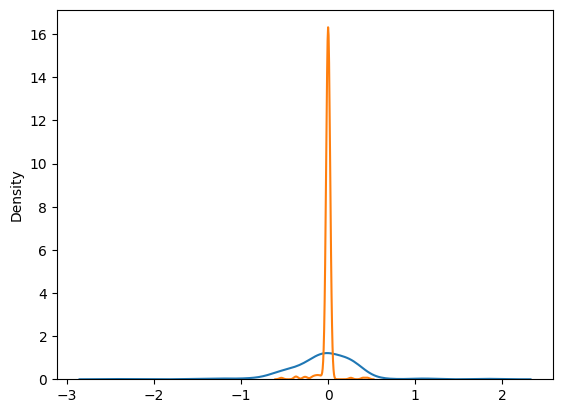

In [40]:
sns.distplot(model1_weight_layer1, hist=False)
sns.distplot(model_weight_layer1, hist=False)